In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\anany\Downloads\Data-Collisions.csv')
data.head()

C:\Users\anany\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
pro_data=data[['SEVERITYCODE','ADDRTYPE','COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']]
pro_data

pro_data=pro_data.dropna()
pro_data['SEVERITYCODE'].value_counts()

1    130634
2     56870
Name: SEVERITYCODE, dtype: int64

In [5]:

pro_data.loc[pro_data.ROADCOND == "Other", "ROADCOND"] = "Unknown"
pro_data.loc[pro_data.WEATHER == "Other", "WEATHER"] = "Unknown"
pro_data.loc[pro_data.LIGHTCOND == "Other", "LIGHTCOND"] = "Unknown"
pro_data

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Angles,Overcast,Wet,Daylight
1,1,Block,Sideswipe,Raining,Wet,Dark - Street Lights On
2,1,Block,Parked Car,Overcast,Dry,Daylight
3,1,Block,Other,Clear,Dry,Daylight
4,2,Intersection,Angles,Raining,Wet,Daylight
...,...,...,...,...,...,...
194668,2,Block,Head On,Clear,Dry,Daylight
194669,1,Block,Rear Ended,Raining,Wet,Daylight
194670,2,Intersection,Left Turn,Clear,Dry,Daylight
194671,2,Intersection,Cycles,Clear,Dry,Dusk


In [6]:
df1=pro_data[pro_data.SEVERITYCODE==1]
df2=pro_data[pro_data.SEVERITYCODE==2]
df_resampled=resample(df1 , replace=False ,n_samples=56870,random_state=111)

ready_data=pd.concat([df_resampled,df2])

ready_data['SEVERITYCODE'].value_counts()
#This is done so that the model is trained to predict the severity for any case with equal probability

2    56870
1    56870
Name: SEVERITYCODE, dtype: int64

In [7]:
ready_data.reset_index(inplace = True, drop = True) 


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

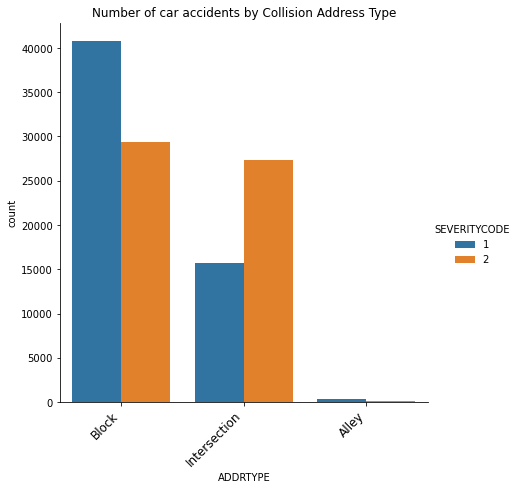

In [8]:
ready_1=ready_data[['SEVERITYCODE','ADDRTYPE']]
ax1=sns.catplot(x='ADDRTYPE',hue='SEVERITYCODE',kind='count',data=ready_1,height=6)
plt.title("Number of car accidents by Collision Address Type")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

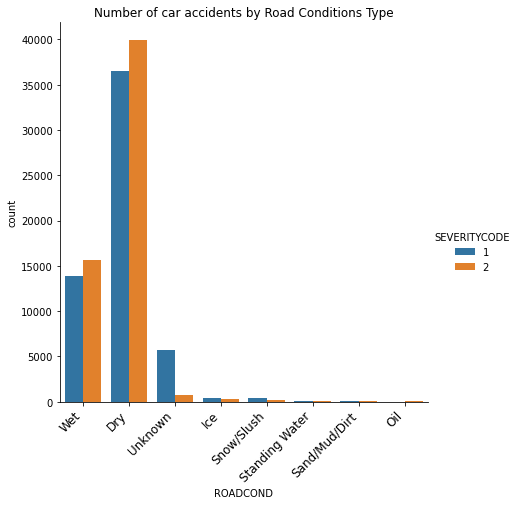

In [9]:
ready_2=ready_data[['SEVERITYCODE','ROADCOND']]
sns.catplot(x='ROADCOND',hue='SEVERITYCODE',kind='count',data=ready_2,height=6)
plt.title("Number of car accidents by Road Conditions Type")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

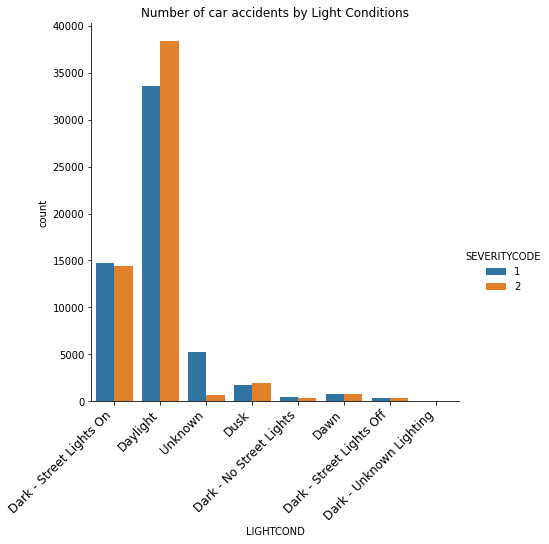

In [10]:
ready_3=ready_data[['SEVERITYCODE','LIGHTCOND']]
ax=sns.catplot(x='LIGHTCOND',hue='SEVERITYCODE',kind='count',data=ready_3,height=6)
plt.title("Number of car accidents by Light Conditions")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

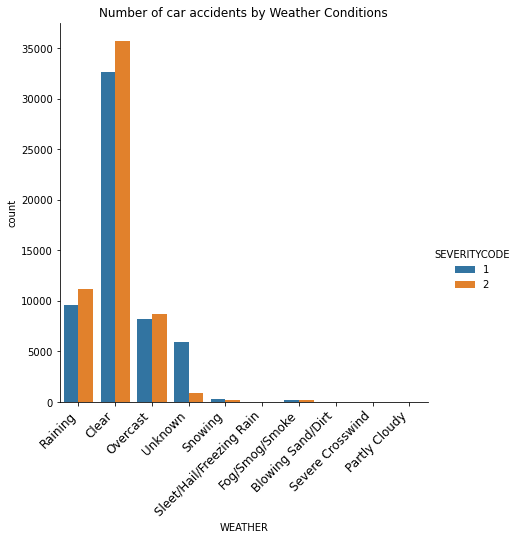

In [11]:
ready_3=ready_data[['SEVERITYCODE','WEATHER']]
sns.catplot(x='WEATHER',hue='SEVERITYCODE',kind='count',data=ready_3,height=6)
plt.title("Number of car accidents by Weather Conditions")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

In [12]:
ready_data["COLLISIONTYPE"] = ready_data["COLLISIONTYPE"].astype('category')
ready_data['WEATHER'] = ready_data['WEATHER'].astype('category')
ready_data['ROADCOND'] = ready_data["ROADCOND"].astype('category')
ready_data['LIGHTCOND'] = ready_data['LIGHTCOND'].astype('category')
ready_data['ADDRTYPE'] = ready_data['ADDRTYPE'].astype('category')
ready_data.dtypes

SEVERITYCODE        int64
ADDRTYPE         category
COLLISIONTYPE    category
WEATHER          category
ROADCOND         category
LIGHTCOND        category
dtype: object

In [13]:
ready_data['ADDRTYPE_Category'] = ready_data['ADDRTYPE'].cat.codes
ready_data["COLLISIONTYPE_Category"] = ready_data["COLLISIONTYPE"].cat.codes
ready_data['LIGHTCOND_Category'] = ready_data['LIGHTCOND'].cat.codes
ready_data['ROADCOND_Category'] = ready_data["ROADCOND"].cat.codes
ready_data['WEATHER_Category'] = ready_data['WEATHER'].cat.codes

ready_data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,ADDRTYPE_Category,COLLISIONTYPE_Category,LIGHTCOND_Category,ROADCOND_Category,WEATHER_Category
0,1,Block,Other,Raining,Wet,Dark - Street Lights On,1,4,2,7,5
1,1,Block,Angles,Clear,Dry,Daylight,1,0,5,0,1
2,1,Intersection,Angles,Overcast,Wet,Daylight,2,0,5,7,3
3,1,Block,Sideswipe,Clear,Dry,Daylight,1,9,5,0,1
4,1,Block,Rear Ended,Overcast,Dry,Daylight,1,7,5,0,3


In [14]:
df=ready_data[['ADDRTYPE','ADDRTYPE_Category']]
df.ADDRTYPE.unique()

[Block, Intersection, Alley]
Categories (3, object): [Block, Intersection, Alley]

In [15]:
x_data=ready_data[['ADDRTYPE_Category','COLLISIONTYPE_Category','WEATHER_Category','ROADCOND_Category','LIGHTCOND_Category']]
y_data=ready_data[['SEVERITYCODE']]
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.21,random_state=0)

# K Nearest Neighbor

In [16]:
acc = []
f1=[]
j=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat1 = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat1))
    f1.append(f1_score(y_test, yhat1,average="macro"))
    j.append(jaccard_score(y_test, yhat1, average='macro'))



<ipython-input-16-b3b3ddfefd52>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
<ipython-input-16-b3b3ddfefd52>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
<ipython-input-16-b3b3ddfefd52>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
<ipython-input-16-b3b3ddfefd52>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifie

Text(0, 0.5, 'Accuracy')

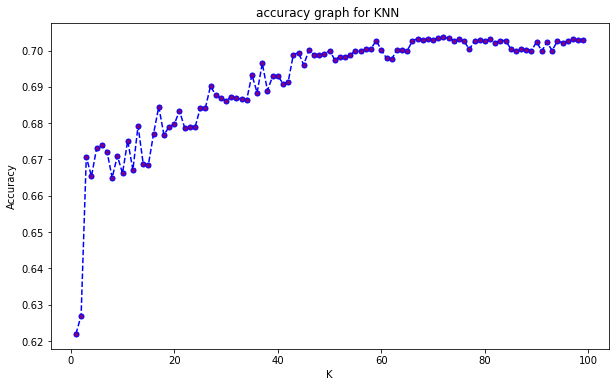

In [17]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='.',markerfacecolor='purple', markersize=10)

plt.title('accuracy graph for KNN ')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [18]:
print("Maximum accuracy:-",max(acc),"at K =",acc[80])

Maximum accuracy:- 0.7035920622959055 at K = 0.7031315414887381


Text(0, 0.5, 'F1_score')

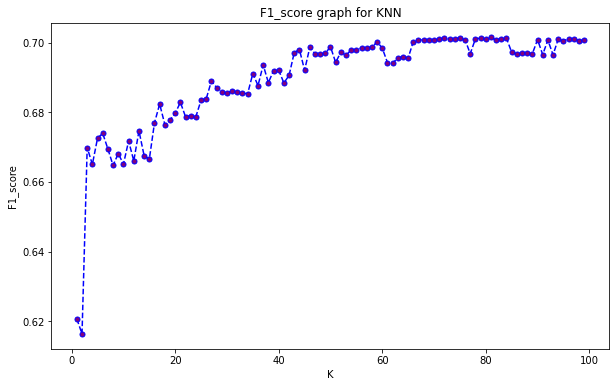

In [19]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),f1,color = 'blue',linestyle='dashed', 
         marker='.',markerfacecolor='purple', markersize=10)
plt.title('F1_score graph for KNN')
plt.xlabel('K')
plt.ylabel('F1_score')

In [20]:
print("Maximum F1_score:-",max(f1),"at K =",f1.index(max(f1)))

Maximum F1_score:- 0.7014905423168485 at K = 80


Text(0, 0.5, 'Jaccard_score')

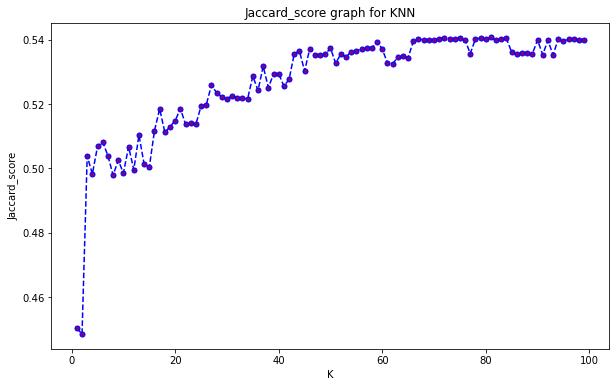

In [21]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),j,color = 'blue',linestyle='dashed', 
         marker='.',markerfacecolor='purple', markersize=10)
plt.title('Jaccard_score graph for KNN')
plt.xlabel('K')
plt.ylabel('Jaccard_score')

In [22]:
print("Maximum j_score:-",max(j),"at K =",j.index(max(j)))

Maximum j_score:- 0.5406751158157558 at K = 80


In [80]:
neigh = KNeighborsClassifier(n_neighbors = 80).fit(x_train,y_train)
yhat1 = neigh.predict(x_test)
acc_knn=metrics.accuracy_score(y_test, yhat1)
f1_knn=f1_score(y_test, yhat1,average="macro")
j_knn=jaccard_score(y_test, yhat1, average='macro')
print ("Accuracy = %f\nF1_score = %f\nJaccard_score = %f" % (acc_knn , f1_knn , j_knn))

<ipython-input-80-56312990a58d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  neigh = KNeighborsClassifier(n_neighbors = 80).fit(x_train,y_train)


Accuracy = 0.702587
F1_score = 0.701023
Jaccard_score = 0.540100


# DECISION TREE

In [55]:
accdt = []
f1dt=[]
jdt=[]

from sklearn.tree import DecisionTreeClassifier
for i in range(1,30):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree 
    drugTree.fit(x_train,y_train)
    yhat2 = drugTree.predict(x_test)
    accdt.append(metrics.accuracy_score(y_test, yhat2))
    f1dt.append(f1_score(y_test, yhat2,average="macro"))
    jdt.append(jaccard_score(y_test, yhat2, average='macro'))
    

Text(0, 0.5, 'Accuracy')

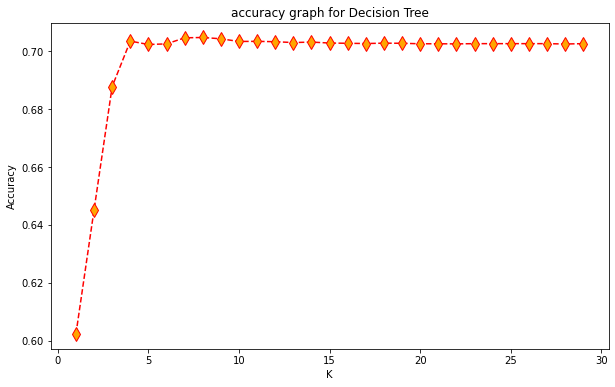

In [56]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accdt,color = 'red',linestyle='dashed', 
         marker='d',markerfacecolor='orange', markersize=10)

plt.title('accuracy graph for Decision Tree')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [57]:
print("Maximum accuracy:-",max(accdt),"at K =",accdt.index(max(accdt)))

Maximum accuracy:- 0.7047642970777862 at K = 7


Text(0, 0.5, 'F1_score')

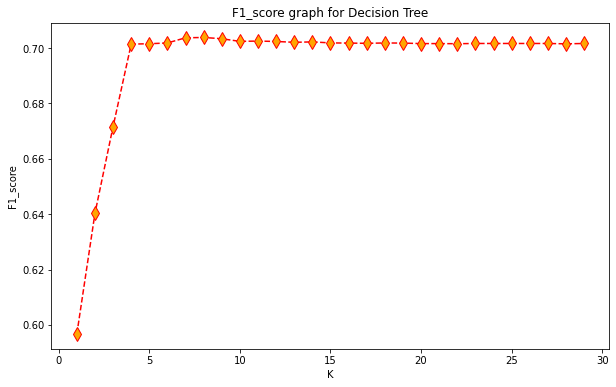

In [58]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),f1dt,color = 'red',linestyle='dashed', 
         marker='d',markerfacecolor='orange', markersize=10)
plt.title('F1_score graph for Decision Tree')
plt.xlabel('K')
plt.ylabel('F1_score')

In [59]:
print("Maximum F1_score:-",max(f1dt),"at K =",f1dt.index(max(f1dt)))

Maximum F1_score:- 0.7037984034972186 at K = 7


Text(0, 0.5, 'Jaccard_score')

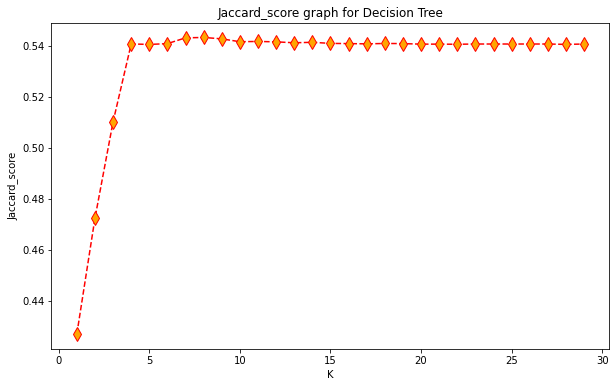

In [60]:
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),jdt,color = 'red',linestyle='dashed', 
         marker='d',markerfacecolor='orange', markersize=10)
plt.title('Jaccard_score graph for Decision Tree')
plt.xlabel('K')
plt.ylabel('Jaccard_score')

In [61]:
print("Maximum j_score:-",max(jdt),"at K =",jdt.index(max(jdt)))

Maximum j_score:- 0.5432326496259683 at K = 7


In [78]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
drugTree.fit(x_train,y_train)
yhat2 = drugTree.predict(x_test)
acc_dt=metrics.accuracy_score(y_test, yhat2)
f1_dt=f1_score(y_test, yhat2,average="macro")
j_dt=jaccard_score(y_test, yhat2, average='macro')
print ("Accuracy = %f\nF1_score = %f\nJaccard_score = %f" % (acc_dt , f1_dt , j_dt))


Accuracy = 0.704639
F1_score = 0.703682
Jaccard_score = 0.543092


# Logestic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1, solver='liblinear').fit(x_train,y_train)
yhat3 = LR.predict(x_test)


C:\Users\anany\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.5979654746320453


In [75]:
acc_lr=metrics.accuracy_score(y_test, yhat3)
f1_lr=f1_score(y_test, yhat3,average="macro")
j_lr=jaccard_score(y_test, yhat3, average='macro')

In [76]:
print ("Accuracy = %f\nF1_score = %f\nJaccard_score = %f" % (acc_lr , f1_lr , j_lr))

Accuracy = 0.602612
F1_score = 0.597965
Jaccard_score = 0.427855
